# 1. Reading the dataset and displaying some information about the dataset.

In [2]:
# (1) Importing required libraries



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Reading the dataset
df=pd.read_csv('C:/Users/FARHAN/OneDrive/Desktop/bank_loan_defaulter (1).csv')


In [4]:
# Now checking the few samples of  dataset
df.head()

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1     BAT1586599      12.237563     C        D3                RENT  ...   
2     BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3     BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4     BAT5341619      15.008300     C        D4            MORTGAGE  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2.498291                0.793724                            0   
1     2.377215                0.974821                            0   
2     4.316277                1.020075                            0   
3     0.107020                0.749971                            0   
4  1294.818751                0.368953                            0   

  Application Type  Last week Pay  Accounts Delinquent  \
0       INDIVIDUAL             49                    0   
1       INDIVIDUAL            109                    0   
2       INDIVIDUAL             66                    0   
3       INDIVIDUAL             39                    0   
4       INDIVIDUAL             18                    0   

   Total Collection Amount  Total Current Balance  \
0                       31                 311301   
1                       53                 182610   
2                       34                  89801   
3                       40                   9189   
4                      430                 126029   

   Total Revolving Credit Limit  Loan Status  
0                          6619            0  
1                         20885            0  
2                         26155            0  
3                         60214            0  
4                         22579            0  

[5 rows x 35 columns]

In [5]:
# checking the shape of the  dataset
df.shape

(67463, 35)

In [6]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

# No null entries found in the dataset

In [7]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [8]:
# check for unique values
df.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

# 2. Data cleansing and Exploratory data analysis:

In [9]:
df.duplicated().value_counts()
# no duplicate values found in the data

False    67463
dtype: int64

In [10]:
missing_values=(df.isnull().sum()/df.shape[0]*100)
missing_values

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

# No missing values found in the dataset

In [11]:
# checking statistical summary of the dataset
df.describe().T

count          mean           std  \
ID                            67463.0  2.562761e+07  2.109155e+07   
Loan Amount                   67463.0  1.684890e+04  8.367866e+03   
Funded Amount                 67463.0  1.577060e+04  8.150993e+03   
Funded Amount Investor        67463.0  1.462180e+04  6.785345e+03   
Term                          67463.0  5.817381e+01  3.327441e+00   
Interest Rate                 67463.0  1.184626e+01  3.718629e+00   
Home Ownership                67463.0  8.054150e+04  4.502912e+04   
Debit to Income               67463.0  2.329924e+01  8.451824e+00   
Delinquency - two years       67463.0  3.271275e-01  8.008884e-01   
Inquires - six months         67463.0  1.457540e-01  4.732913e-01   
Open Account                  67463.0  1.426656e+01  6.225060e+00   
Public Record                 67463.0  8.143723e-02  3.466057e-01   
Revolving Balance             67463.0  7.699342e+03  7.836148e+03   
Revolving Utilities           67463.0  5.288944e+01  2.253945e+01   
Total Accounts                67463.0  1.862793e+01  8.319246e+00   
Total Received Interest       67463.0  2.068993e+03  2.221919e+03   
Total Received Late Fee       67463.0  1.143969e+00  5.244365e+00   
Recoveries                    67463.0  5.969158e+01  3.570263e+02   
Collection Recovery Fee       67463.0  1.125141e+00  3.489885e+00   
Collection 12 months Medical  67463.0  2.130056e-02  1.443855e-01   
Last week Pay                 67463.0  7.116326e+01  4.331585e+01   
Accounts Delinquent           67463.0  0.000000e+00  0.000000e+00   
Total Collection Amount       67463.0  1.464680e+02  7.443822e+02   
Total Current Balance         67463.0  1.595739e+05  1.390332e+05   
Total Revolving Credit Limit  67463.0  2.312301e+04  2.091670e+04   
Loan Status                   67463.0  9.250997e-02  2.897466e-01   

                                       min           25%           50%  \
ID                            1.297933e+06  6.570288e+06  1.791565e+07   
Loan Amount                   1.014000e+03  1.001200e+04  1.607300e+04   
Funded Amount                 1.014000e+03  9.266500e+03  1.304200e+04   
Funded Amount Investor        1.114590e+03  9.831685e+03  1.279368e+04   
Term                          3.600000e+01  5.800000e+01  5.900000e+01   
Interest Rate                 5.320006e+00  9.297147e+00  1.137770e+01   
Home Ownership                1.457354e+04  5.168984e+04  6.933583e+04   
Debit to Income               6.752991e-01  1.675642e+01  2.265666e+01   
Delinquency - two years       0.000000e+00  0.000000e+00  0.000000e+00   
Inquires - six months         0.000000e+00  0.000000e+00  0.000000e+00   
Open Account                  2.000000e+00  1.000000e+01  1.300000e+01   
Public Record                 0.000000e+00  0.000000e+00  0.000000e+00   
Revolving Balance             0.000000e+00  2.557000e+03  5.516000e+03   
Revolving Utilities           5.172360e-03  3.865882e+01  5.408233e+01   
Total Accounts                4.000000e+00  1.300000e+01  1.800000e+01   
Total Received Interest       4.736746e+00  5.709038e+02  1.330843e+03   
Total Received Late Fee       3.060000e-06  2.111387e-02  4.339755e-02   
Recoveries                    3.560000e-05  1.629818e+00  3.344524e+00   
Collection Recovery Fee       3.620000e-05  4.762594e-01  7.801406e-01   
Collection 12 months Medical  0.000000e+00  0.000000e+00  0.000000e+00   
Last week Pay                 0.000000e+00  3.500000e+01  6.800000e+01   
Accounts Delinquent           0.000000e+00  0.000000e+00  0.000000e+00   
Total Collection Amount       1.000000e+00  2.400000e+01  3.600000e+01   
Total Current Balance         6.170000e+02  5.037900e+04  1.183690e+05   
Total Revolving Credit Limit  1.000000e+03  8.155500e+03  1.673300e+04   
Loan Status                   0.000000e+00  0.000000e+00  0.000000e+00   

                                       75%           max  
ID                            4.271521e+07  7.224578e+07  
Loan Amount                   2.210600e+04  3.50000

In [ ]:
# keyobservation
# The dataset contains information on 67,463 loans
# Loan amounts tendwith a wide range (from 1.68.... to 3.5...).
# Borrowers' credit scores show a wide range (5% to 27%), with an average around 12%.+++++
# Most applicants have no recent delinquencies or inquiries.
# There's a positive correlation between loan amount and funded amount.
# Debt-to-income ratio and total accounts have averages around 23% and 18, respectively.


In [12]:
# checking statistical summary of the dataset
df.describe(include='object').T

count unique                      top   freq
Batch Enrolled       67463     41               BAT3873588   3626
Grade                67463      7                        C  19085
Sub Grade            67463     35                       B4   4462
Employment Duration  67463      3                 MORTGAGE  36351
Verification Status  67463      3          Source Verified  33036
Payment Plan         67463      1                        n  67463
Loan Title           67463    109  Credit card refinancing  30728
Initial List Status  67463      2                        w  36299
Application Type     67463      2               INDIVIDUAL  67340

In [ ]:
# All features seem to have a unique value count, ranging from 2 to 67,463
# "Batch Enrolled" has the highest overall count (41), indicating a potential identifier for a specific batch of loan applications.
# Most features have a distinct top frequency value, except for "Payment Plan" where all entries have the same value ("n")

In [13]:
df_copy1=df.copy()

In [14]:
columns_to_drop=['ID','Batch Enrolled','Application Type','Accounts Delinquent','Payment Plan', 'Loan Title']
df_copy1.drop(columns_to_drop,axis=1,inplace=True)
df_copy1

Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0            10000          32236             12329.36286    59   
1             3609          11940             12191.99692    59   
2            28276           9311             21603.22455    59   
3            11170           6954             17877.15585    59   
4            16890          13226             13539.92667    59   
...            ...            ...                     ...   ...   
67458        13601           6848             13175.28583    59   
67459         8323          11046             15637.46301    59   
67460        15897          32921             12329.45775    59   
67461        16567           4975             21353.68465    59   
67462        15353          29875             14207.44860    59   

       Interest Rate Grade Sub Grade Employment Duration  Home Ownership  \
0          11.135007     B        C4            MORTGAGE    176346.62670   
1          12.237563     C        D3                RENT     39833.92100   
2          12.545884     F        D4            MORTGAGE     91506.69105   
3          16.731201     C        C3            MORTGAGE    108286.57590   
4          15.008300     C        D4            MORTGAGE     44234.82545   
...              ...   ...       ...                 ...             ...   
67458       9.408858     C        A4            MORTGAGE     83961.15003   
67459       9.972104     C        B3                RENT     65491.12817   
67460      19.650943     A        F3            MORTGAGE     34813.96985   
67461      13.169095     D        E3                 OWN     96938.83564   
67462      16.034631     B        D1            MORTGAGE    105123.15580   

      Verification Status  ...  Total Received Interest  \
0            Not Verified  ...              2929.646315   
1         Source Verified  ...               772.769385   
2         Source Verified  ...               863.324396   
3         Source Verified  ...               288.173196   
4         Source Verified  ...               129.239553   
...                   ...  ...                      ...   
67458            Verified  ...              1978.945960   
67459     Source Verified  ...              3100.803125   
67460            Verified  ...              2691.995532   
67461        Not Verified  ...              3659.334202   
67462            Verified  ...              1324.255922   

       Total Received Late Fee   Recoveries  Collection Recovery Fee  \
0                     0.102055     2.498291                 0.793724   
1                     0.036181     2.377215                 0.974821   
2                    18.778660     4.316277                 1.020075   
3                     0.044131     0.107020                 0.749971   
4                    19.306646  1294.818751                 0.368953   
...                        ...          ...                      ...   
67458                 0.023478   564.614852                 0.865230   
67459                 0.027095     2.015494                 1.403368   
67460                 0.028212     5.673092                 1.607093   
67461                 0.074508     1.157454                 0.207608   
67462                 0.000671     1.856480                 0.366386   

       Collection 12 months Medical  Last week Pay  Total Collection Amount  \
0                                 0             49                       31   
1                                 0            109                       53   
2                                 0             66                       34   
3                                 0             39                       40   
4                                 0             18                      430   
...                             ...            ...                      ...   
67458                             0             69                       48   
67459                             0             14                       37   
6746

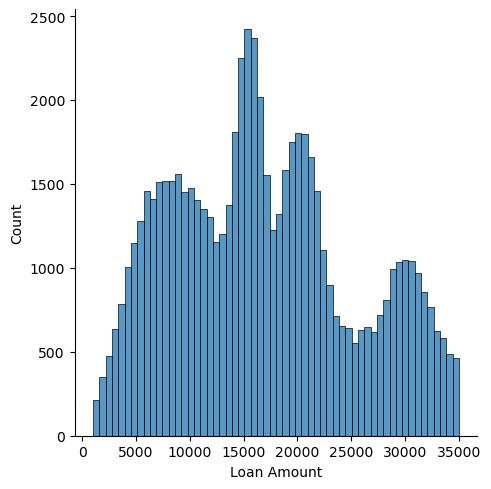

In [15]:
sns.displot(df_copy1['Loan Amount'])

<Axes: xlabel='Loan Amount', ylabel='Interest Rate'>

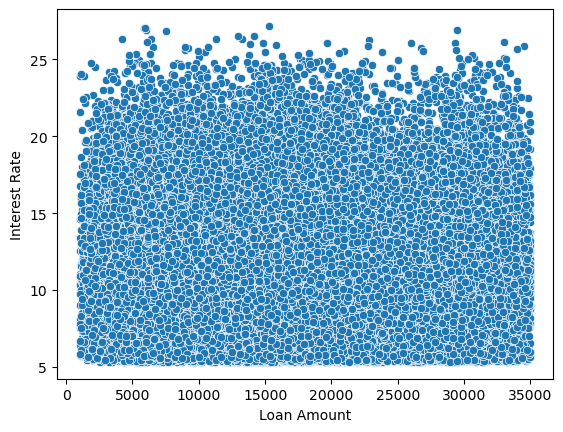

In [16]:
sns.scatterplot(x='Loan Amount', y='Interest Rate', data=df_copy1)

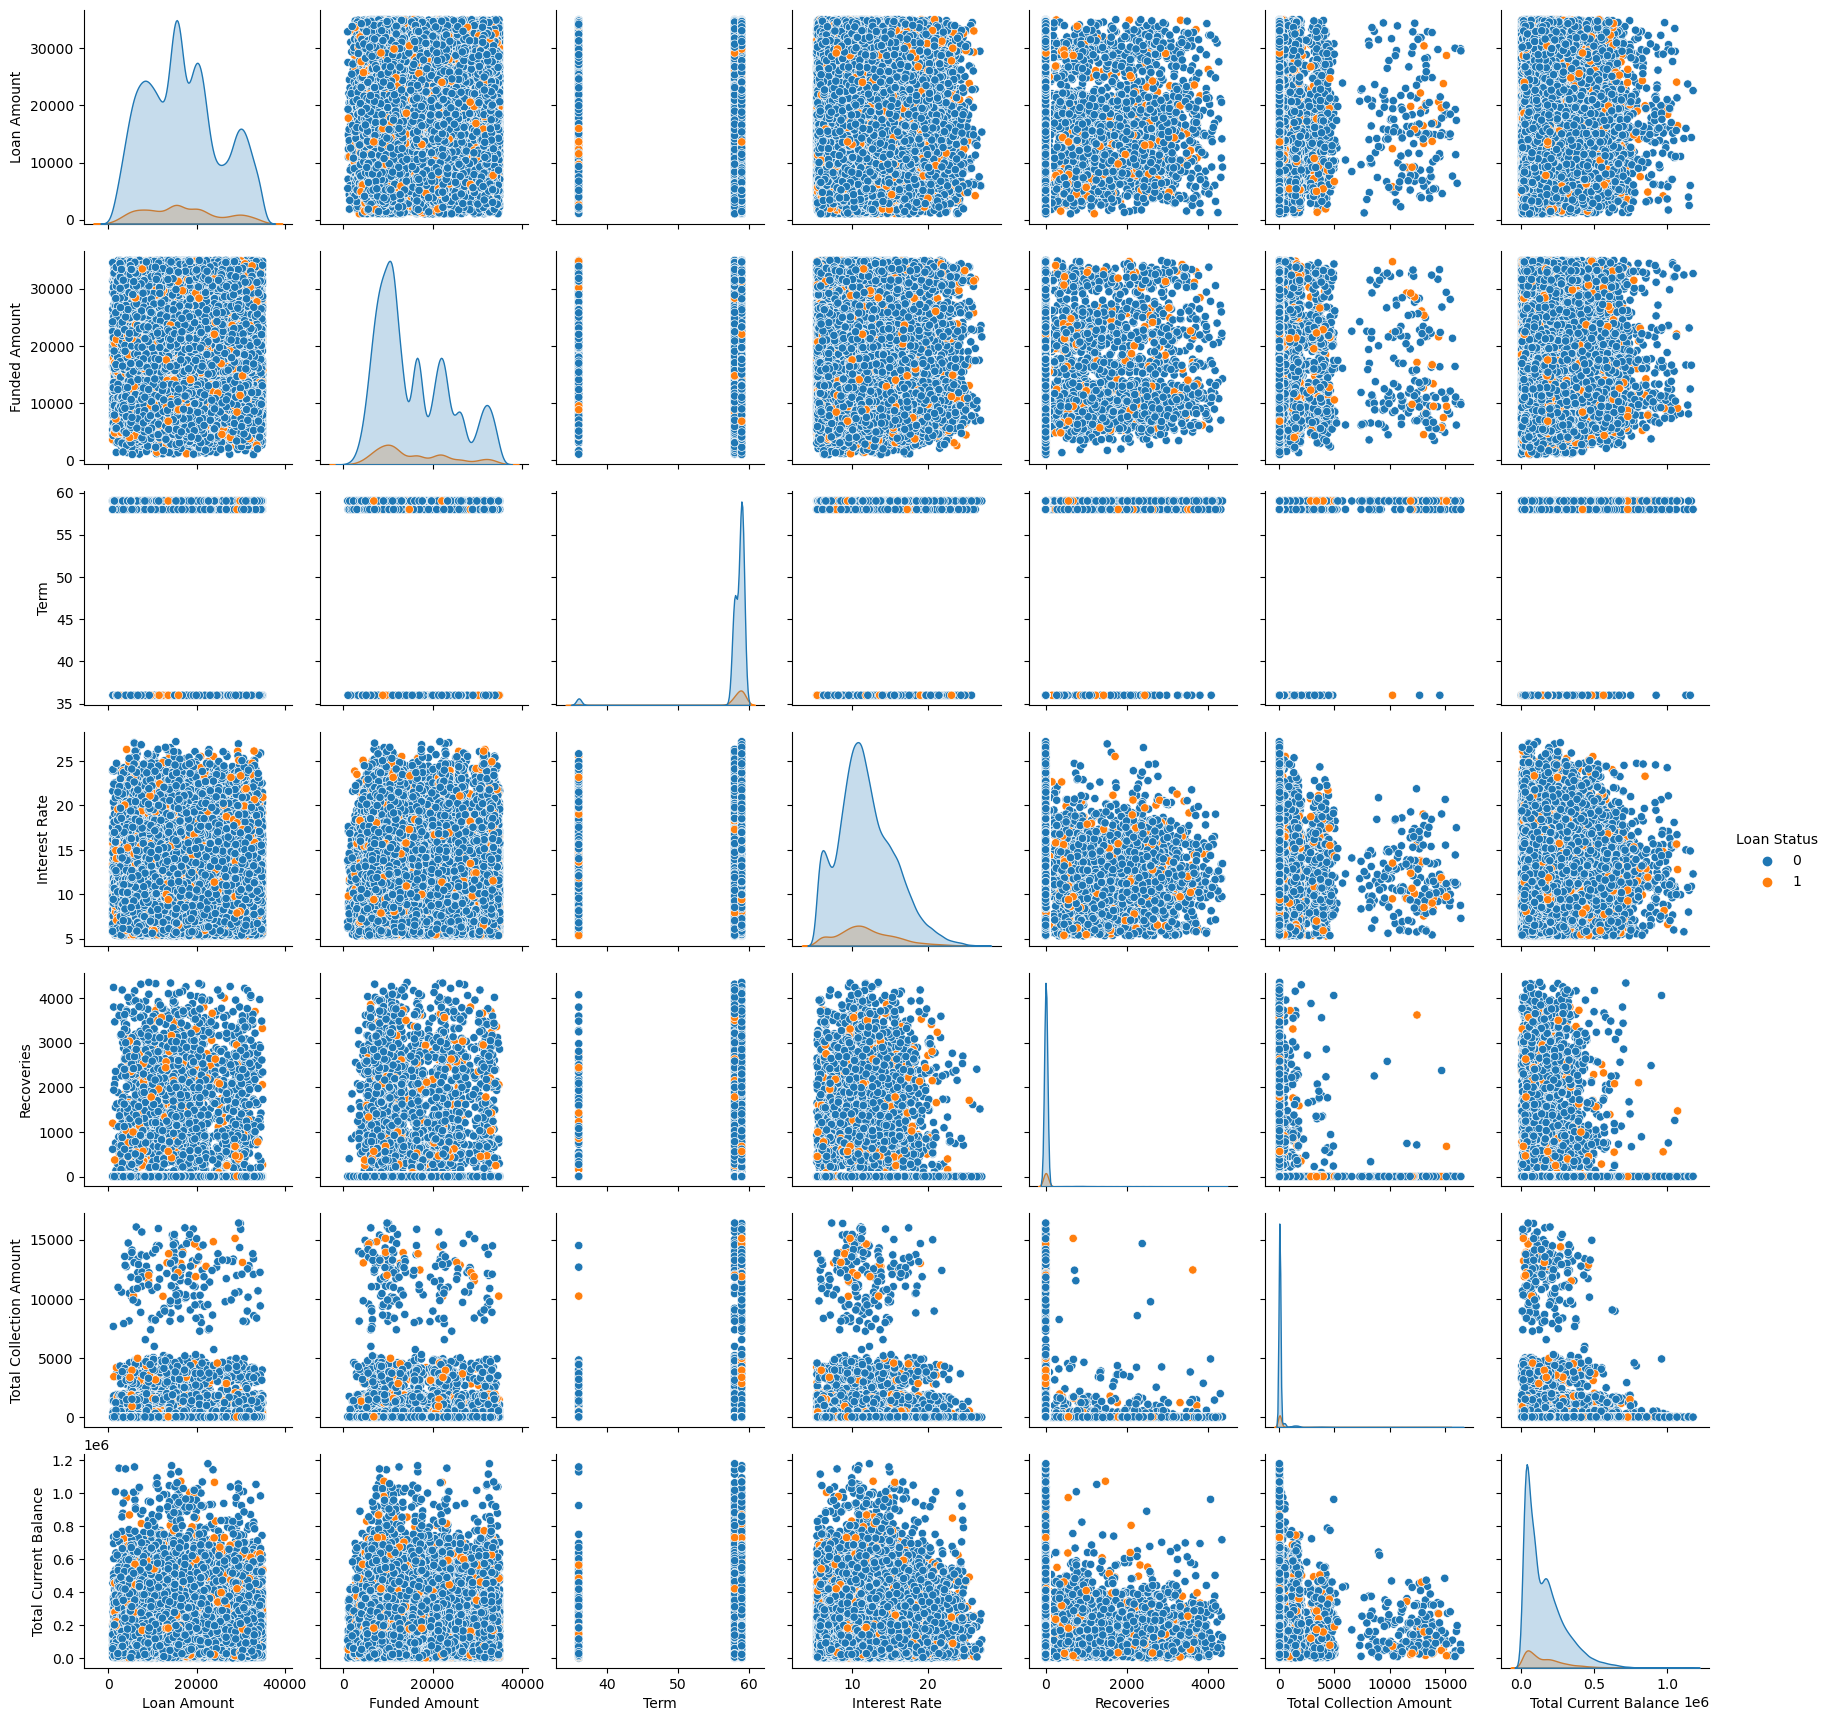

In [17]:
# Pairplot using sns
important_features=['Loan Amount', 'Funded Amount', 'Term', 'Interest Rate', 'Recoveries', 'Total Collection Amount', 'Total Current Balance','Loan Status']
sns.pairplot(df_copy1[important_features] , hue='Loan Status' , diag_kind = 'kde')

<Axes: ylabel='Loan Status'>

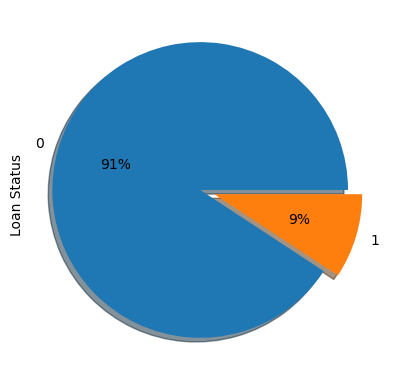

In [18]:
df_copy1['Loan Status'].value_counts().plot(kind='pie',autopct='%1.0f%%' , explode=[0.1,0],shadow=True)

# Data preparation for model building

In [19]:
# Seperate the target and independent features
X = df_copy1.drop('Loan Status',axis=1)
y = df_copy1['Loan Status'] 
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Loan Status, dtype: int64

In [20]:
X.head()

Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

  Grade Sub Grade Employment Duration  Home Ownership Verification Status  \
0     B        C4            MORTGAGE    176346.62670        Not Verified   
1     C        D3                RENT     39833.92100     Source Verified   
2     F        D4            MORTGAGE     91506.69105     Source Verified   
3     C        C3            MORTGAGE    108286.57590     Source Verified   
4     C        D4            MORTGAGE     44234.82545     Source Verified   

   ...  Initial List Status  Total Received Interest  Total Received Late Fee  \
0  ...                    w              2929.646315                 0.102055   
1  ...                    f               772.769385                 0.036181   
2  ...                    w               863.324396                18.778660   
3  ...                    w               288.173196                 0.044131   
4  ...                    w               129.239553                19.306646   

    Recoveries  Collection Recovery Fee  Collection 12 months Medical  \
0     2.498291                 0.793724                             0   
1     2.377215                 0.974821                             0   
2     4.316277                 1.020075                             0   
3     0.107020                 0.749971                             0   
4  1294.818751                 0.368953                             0   

   Last week Pay  Total Collection Amount Total Current Balance  \
0             49                       31                311301   
1            109                       53                182610   
2             66                       34                 89801   
3             39                       40                  9189   
4             18                      430                126029   

   Total Revolving Credit Limit  
0                          6619  
1                         20885  
2                         26155  
3                         60214  
4                         22579  

[5 rows x 28 columns]

In [21]:
X.info()
data=df_copy1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   Employment Duration           67463 non-null  object 
 8   Home Ownership                67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Delinquency - two years       67463 non-null  int64  
 12  Inquires - six months         67463 non-null  int64  
 13  O

In [22]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define columns to encode
columns_to_encode = ['Grade', 'Sub Grade', 'Employment Duration', 'Verification Status','Initial List Status']

# Iterate over columns and perform label encoding
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Print the encoded Data Frame
print(data)

       Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0            10000          32236             12329.36286    59   
1             3609          11940             12191.99692    59   
2            28276           9311             21603.22455    59   
3            11170           6954             17877.15585    59   
4            16890          13226             13539.92667    59   
...            ...            ...                     ...   ...   
67458        13601           6848             13175.28583    59   
67459         8323          11046             15637.46301    59   
67460        15897          32921             12329.45775    59   
67461        16567           4975             21353.68465    59   
67462        15353          29875             14207.44860    59   

       Interest Rate  Grade  Sub Grade  Employment Duration  Home Ownership  \
0          11.135007      1         13                    0    176346.62670   
1          12.237563      2         1

In [23]:
# again Segregrate the target and independent features after lable encoding
x = data.drop('Loan Status',axis=1)
y = data['Loan Status'] 
x.head()

Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

   Grade  Sub Grade  Employment Duration  Home Ownership  Verification Status  \
0      1         13                    0    176346.62670                    0   
1      2         17                    2     39833.92100                    1   
2      5         18                    0     91506.69105                    1   
3      2         12                    0    108286.57590                    1   
4      2         18                    0     44234.82545                    1   

   ...  Initial List Status  Total Received Interest  Total Received Late Fee  \
0  ...                    1              2929.646315                 0.102055   
1  ...                    0               772.769385                 0.036181   
2  ...                    1               863.324396                18.778660   
3  ...                    1               288.173196                 0.044131   
4  ...                    1               129.239553                19.306646   

    Recoveries  Collection Recovery Fee  Collection 12 months Medical  \
0     2.498291                 0.793724                             0   
1     2.377215                 0.974821                             0   
2     4.316277                 1.020075                             0   
3     0.107020                 0.749971                             0   
4  1294.818751                 0.368953                             0   

   Last week Pay  Total Collection Amount  Total Current Balance  \
0             49                       31                 311301   
1            109                       53                 182610   
2             66                       34                  89801   
3             39                       40                   9189   
4             18                      430                 126029   

   Total Revolving Credit Limit  
0                          6619  
1                         20885  
2                         26155  
3                         60214  
4                         22579  

[5 rows x 28 columns]

<Axes: >

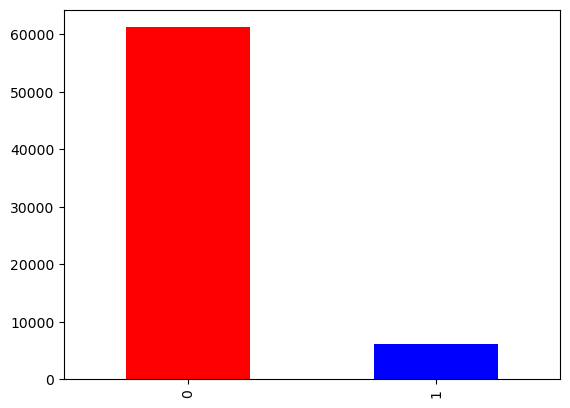

In [24]:
data['Loan Status'].value_counts().plot(kind='bar', color=['red','blue'])

In [25]:
print("before sampling target y label 1 ", sum(y==1))
print("before sampling target y label 0", sum(y==0))

before sampling target y label 1  6241
before sampling target y label 0 61222


In [26]:
!pip install imblearn

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state = 402)
X_smote, y_smote = smote.fit_resample(x,y)

In [29]:
print("after sampling target y label 1 ", sum(y_smote==1))
print("after  sampling target y label 0", sum(y_smote==0))


after sampling target y label 1  61222
after  sampling target y label 0 61222


In [30]:
# target class in now balanced
# Split the dataset into train and test. (i.e 70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(85710, 28) (36734, 28)
(85710,) (36734,)


In [31]:
# Standardize the data
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [35]:
# Feature Selection using Wrapper Methods
# Forward Selection
# Build Log Reg  to use in feature selection
logR = LogisticRegression(max_iter=1000)
# Build step forward feature selection
sfs1 = sfs(logR, k_features=15, forward=True, cv=15)
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [39]:
# to view the metric of each of the feature selected by the algorithm
sfs2=sfs1.get_metric_dict()

In [41]:
# Converting result of sf1 to dataframe
sfs3= pd.DataFrame.from_dict(sfs2)

In [42]:
sfs3

1   \
feature_idx                                                (18,)   
cv_scores      [0.6303815190759537, 0.6386069303465173, 0.623...   
avg_score                                               0.626275   
feature_names                             (Initial List Status,)   
ci_bound                                                 0.00352   
std_dev                                                 0.006179   
std_err                                                 0.001651   

                                                              2   \
feature_idx                                              (7, 18)   
cv_scores      [0.6629331466573328, 0.6617080854042702, 0.658...   
avg_score                                               0.653634   
feature_names         (Employment Duration, Initial List Status)   
ci_bound                                                 0.00793   
std_dev                                                  0.01392   
std_err                                                  0.00372   

                                                              3   \
feature_idx                                          (7, 18, 20)   
cv_scores      [0.6641582079103955, 0.6629331466573328, 0.661...   
avg_score                                               0.659876   
feature_names  (Employment Duration, Initial List Status, Tot...   
ci_bound                                                0.003312   
std_dev                                                 0.005813   
std_err                                                 0.001554   

                                                              4   \
feature_idx                                      (7, 18, 20, 21)   
cv_scores      [0.664333216660833, 0.6631081554077703, 0.6613...   
avg_score                                                0.66011   
feature_names  (Employment Duration, Initial List Status, Tot...   
ci_bound                                                0.003317   
std_dev                                                 0.005823   
std_err                                                 0.001556   

                                                              5   \
feature_idx                                  (7, 18, 20, 21, 25)   
cv_scores      [0.6624081204060203, 0.6627581379068953, 0.661...   
avg_score                                               0.659386   
feature_names  (Employment Duration, Initial List Status, Tot...   
ci_bound                                                0.003049   
std_dev                                                 0.005353   
std_err                                                 0.001431   

                                                              6   \
feature_idx                              (7, 10, 18, 20, 21, 25)   
cv_scores      [0.6622331116555827, 0.6627581379068953, 0.661...   
avg_score                                               0.658511   
feature_names  (Employment Duration, Debit to Income, Initial...   
ci_bound                                                0.003728   
std_dev                                                 0.006545   
std_err                                                 0.001749   

                                                              7   \
feature_idx                           (3, 7, 10, 18, 20, 21, 25)   
cv_scores      [0.6615330766538327, 0.66030801540077, 0.65680...   
avg_score                                               0.657683   
feature_names  (Term, Employment Duration, Debit to Income, I...   
ci_bound                                                0.003169   
std_dev                                                 0.005562   
std_err                                                 0.001487   

                                                              8   \
feature_idx                        (3, 7, 8, 10, 18, 20, 21, 25)   
cv_scores      [0.6622331116555827, 0.6594329716485824, 0.657...   
avg_score                                  

In [43]:
# import required lbraries to plot the graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [44]:
fig = plot_sfs(sfs2)

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [45]:
# Which features?
columnList = list(X)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[3, 4, 5, 7, 8, 9, 10, 11, 14, 18, 20, 21, 22, 23, 25]


In [46]:
# to fetch the names of the columns using the index
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['Term', 'Interest Rate', 'Grade', 'Employment Duration', 'Home Ownership', 'Verification Status', 'Debit to Income', 'Delinquency - two years', 'Public Record', 'Initial List Status', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Total Collection Amount']


In [47]:
# Build full model with forward selection features
logR1 = LogisticRegression(max_iter=1000)
logR1.fit(X_train[subsetColumnList], y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_train_pred = logR1.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % logR1.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.667


In [49]:
y_test_pred = logR1.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % logR1.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.670


In [50]:
prediction=logR1.predict(X_test[subsetColumnList])
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[12054  6428]
 [ 5680 12572]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67     18482
           1       0.66      0.69      0.67     18252

    accuracy                           0.67     36734
   macro avg       0.67      0.67      0.67     36734
weighted avg       0.67      0.67      0.67     36734



In [51]:
# Backward Elimination
# Build LogReg  to use in feature selection
logR2 = LogisticRegression(solver='lbfgs', max_iter=1000)
# Build backward feature selection
logreg_backward = sfs(logR2, k_features=15, forward=False, cv=15)
# Perform SFFS
sfs_backward = logreg_backward.fit(X_train.values, y_train)

In [52]:
sfs_backward1=sfs_backward.get_metric_dict()

In [53]:
# Converting result of sf1 to dataframe
sfs_backward1 = pd.DataFrame.from_dict(sfs_backward1)

In [54]:
fig = plot_sfs(sfs_backward1)

plt.title('Backward Forward Selection')
plt.grid()
plt.show()

In [55]:
feat_cols = list(sfs_backward.k_feature_idx_)
print(feat_cols)

[1, 3, 5, 6, 7, 9, 11, 12, 13, 14, 17, 18, 20, 23, 24]


In [56]:
subsetColumnList1 = [columnList[i] for i in feat_cols] 
print(subsetColumnList1)

['Funded Amount', 'Term', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Total Accounts', 'Initial List Status', 'Total Received Late Fee', 'Collection 12 months Medical', 'Last week Pay']


In [ ]:
# Build full model with backward selection features


In [57]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train[subsetColumnList1], y_train)

y_train_pred = logreg.predict(X_train[subsetColumnList1])
print('Training accuracy on selected features: %.3f' % logreg.score(X_train[subsetColumnList1], y_train))
y_test_pred = logreg.predict(X_test[subsetColumnList1])
print('Testing accuracy on selected features: %.3f' % logreg.score(X_test[subsetColumnList1], y_test))

Training accuracy on selected features: 0.673
Testing accuracy on selected features: 0.676


In [58]:
prediction=logreg.predict(X_test[subsetColumnList1].values)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[12005  6477]
 [ 5426 12826]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67     18482
           1       0.66      0.70      0.68     18252

    accuracy                           0.68     36734
   macro avg       0.68      0.68      0.68     36734
weighted avg       0.68      0.68      0.68     36734



In [59]:
# Feature Selection using Wrapper Methods (Regularization)
regression_model = LogisticRegression(max_iter=1000)
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Loan Amount is -0.03526668880474711
The coefficient for Funded Amount is -0.024948534530884366
The coefficient for Funded Amount Investor is -0.038514288727590607
The coefficient for Term is -0.0999970256703472
The coefficient for Interest Rate is 0.008505828486062404
The coefficient for Grade is -0.21204783622658602
The coefficient for Sub Grade is -0.047329109021750984
The coefficient for Employment Duration is -0.3057324630369643
The coefficient for Home Ownership is 0.017623619480104432
The coefficient for Verification Status is -0.390764891996363
The coefficient for Debit to Income is -0.0062723632960772855
The coefficient for Delinquency - two years is -0.20278015215853312
The coefficient for Inquires - six months is -0.21927007524415484
The coefficient for Open Account is -0.08336586975595306
The coefficient for Public Record is -0.18147938110488027
The coefficient for Revolving Balance is -0.008465813638365524
The coefficient for Revolving Utilities is 0.035

In [60]:
# Create a regularized RIDGE model and note the coefficient
# Building ridge regression model
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-0.01476173 -0.01091104 -0.01632266 -0.04145623  0.00385927 -0.09003699
  -0.02032834 -0.12964452  0.00734535 -0.16761612 -0.00251186 -0.07815031
  -0.08476127 -0.03524078 -0.06659195 -0.00352517  0.01530663 -0.02887633
  -0.22245012 -0.0056466   0.01734462 -0.00509036 -0.00535108 -0.06879951
   0.00313302  0.00350284  0.00864559 -0.00571595]]


In [61]:
# Comparing Ridge and Logistic regression scores
coef_df = pd.DataFrame(
    {'Columns': X_train.columns,
     'Logistic Regression': list(regression_model.coef_[0]),
     'Ridge Regression': list(ridge.coef_[0])
    })
coef_df


Columns  Logistic Regression  Ridge Regression
0                    Loan Amount            -0.035267         -0.014762
1                  Funded Amount            -0.024949         -0.010911
2         Funded Amount Investor            -0.038514         -0.016323
3                           Term            -0.099997         -0.041456
4                  Interest Rate             0.008506          0.003859
5                          Grade            -0.212048         -0.090037
6                      Sub Grade            -0.047329         -0.020328
7            Employment Duration            -0.305732         -0.129645
8                 Home Ownership             0.017624          0.007345
9            Verification Status            -0.390765         -0.167616
10               Debit to Income            -0.006272         -0.002512
11       Delinquency - two years            -0.202780         -0.078150
12         Inquires - six months            -0.219270         -0.084761
13                  Open Account            -0.083366         -0.035241
14                 Public Record            -0.181479         -0.066592
15             Revolving Balance            -0.008466         -0.003525
16           Revolving Utilities             0.035540          0.015307
17                Total Accounts            -0.068492         -0.028876
18           Initial List Status            -0.502984         -0.222450
19       Total Received Interest            -0.014152         -0.005647
20       Total Received Late Fee             0.041052          0.017345
21                    Recoveries            -0.012530         -0.005090
22       Collection Recovery Fee            -0.013070         -0.005351
23  Collection 12 months Medical            -0.212507         -0.068800
24                 Last week Pay             0.007311          0.003133
25       Total Collection Amount             0.008520          0.003503
26         Total Current Balance             0.019994          0.008646
27  Total Revolving Credit Limit            -0.013835         -0.005716

In [62]:
# Print accuracy of log regression model 
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6730603196826508
0.675586649970055


In [63]:
prediction_reg = regression_model.predict(X_test)
prediction_reg

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [64]:
print(confusion_matrix(y_test, prediction_reg))
print(classification_report(y_test, prediction_reg))

[[12002  6480]
 [ 5437 12815]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67     18482
           1       0.66      0.70      0.68     18252

    accuracy                           0.68     36734
   macro avg       0.68      0.68      0.68     36734
weighted avg       0.68      0.68      0.68     36734



In [65]:
# Print accuracy of ridge regression model
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6724302881810758
0.6756138727064844


In [66]:
prediction_ridge = ridge.predict(X_test)
prediction_ridge

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [67]:
print(confusion_matrix(y_test, prediction_ridge))
print(classification_report(y_test, prediction_ridge))

[[11923  6559]
 [ 5357 12895]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67     18482
           1       0.66      0.71      0.68     18252

    accuracy                           0.68     36734
   macro avg       0.68      0.68      0.68     36734
weighted avg       0.68      0.68      0.68     36734



# Model Building and evaluation

In [68]:
# Building a base model using the Original Imbalanced data
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=42)

In [69]:
# create an instance
regression_model = LogisticRegression(max_iter=10000)
#learning
regression_model.fit(X_train1, y_train1)

LogisticRegression(max_iter=10000)

In [70]:
# Train Accuracy
print('Train data Accuracy is: ',regression_model.score(X_train1, y_train1))

Train data Accuracy is:  0.9070811451804167


In [71]:
# Test Accuracy
print('Test data Accuracy is: ',regression_model.score(X_test1, y_test1))

Test data Accuracy is:  0.9084440930876031


In [72]:
prediction=regression_model.predict(X_test1)
print(confusion_matrix(y_test1, prediction))
print(classification_report(y_test1, prediction))

[[18386     0]
 [ 1853     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18386
           1       0.00      0.00      0.00      1853

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.83      0.91      0.86     20239



In [73]:
# Multiple models and tune their hyperparameters using balanced data
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter search spaces:
rf_param_grid = {
    "n_estimators": [100, 200],  # Smaller range
    "max_depth": [3, 5],
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring="f1", n_iter=100
)
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5],
                                        'n_estimators': [100, 200]},
                   scoring='f1')

In [75]:
from xgboost import XGBClassifier
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.05, 0.01],
}
# Try XGBoost Classifier with GridSearchCV:
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), xgb_param_grid, cv=5, scoring="f1")
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [81]:
# Evaluate and select the best model based on F1-score:
best_model1 = None
best_score1 = 0

models1 = [rf_random_search, xgb_grid_search]
for model1 in models1:
    score1 = model1.best_score_
    if score1 > best_score1:
        best_model1 = model1
        best_score1 = score1

print("Best Model:")
print(best_model1)  # This will print the model object with its best hyperparameters

# Make predictions with the best model on the test set
y_pred = best_model1.predict(X_test)

# Evaluate the best model's performance
f2 = f1_score(y_test, y_pred)
print(f"F1-score of the best model: {f2:.4f}")

Best Model:
GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,

# Pipeline

In [88]:
# Building a pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([(" scaler", MinMaxScaler()), (" svm", SVC())])

In [89]:
pipe.fit( X_train, y_train)

Pipeline(steps=[(' scaler', MinMaxScaler()), (' svm', SVC())])

In [90]:
print(" Test score: {:.2f}". format( pipe.score( X_test, y_test)))

 Test score: 0.76


In [91]:
y_pred = pipe.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76     18482
           1       0.76      0.76      0.76     18252

    accuracy                           0.76     36734
   macro avg       0.76      0.76      0.76     36734
weighted avg       0.76      0.76      0.76     36734



# Let's compare the evaluation metrics of the base model and the tuned model:

Baseline Model:

Train Data Accuracy: 0.9071
Test Data Accuracy: 0.9084
Precision: 0.91 (class 0), 0.00 (class 1)
Recall: 1.00 (class 0), 0.00 (class 1)
F1-score: 0.95 (class 0), 0.00 (class 1)





Tuned Model:

F1-score: 0.8533

# Conclusion:

The baseline model achieved high accuracy, but it failed to effectively classify instances of the minority class (class 1),
as indicated by its low precision, recall, and F1-score for that class.
The tuned model, on the other hand, significantly improved the F1-score, demonstrating better performance in capturing
both precision and recall, particularly for the minority class. This improvement suggests that the hyperparameter tuning process and the choice of a more sophisticated model (XGBoost) were successful in enhancing the model's performance, making it more suitable for real-world applications, especially when dealing with imbalanced datasets.

# Steps taken to improve the performance of the model:

1. Model Selection: The baseline model wasn't explicitly mentioned, but it appears to be a simple classification model,
possibly logistic regression. In contrast, the tuned model is an XGBoost classifier,
which is known for its effectiveness in handling complex datasets and providing high predictive performance.

2. Hyperparameter Tuning: The tuned model underwent hyperparameter tuning using grid search with cross-validation.
The hyperparameters adjusted were learning rate, maximum depth of trees, and the number of estimators. 
This process optimizes the model's parameters to improve its predictive capability.


3. Evaluation Metric: The baseline model was evaluated primarily based on accuracy, which is not always suitable
for imbalanced datasets. In contrast, the tuned model's performance was assessed using the F1-score, 
which considers both precision and recall. F1-score is a more appropriate metric for imbalanced datasets because it provides a balance between precision and recall, making it more reliable for evaluating classifier performance.